In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add stats tests that come from scipy.stats to this line
# i have added the test imports relevant to each function as commented lines,
# but you only need to run this imports cell for all functions to work.
# No need to uncomment each import line.
from scipy.stats import pearsonr, f_oneway, mannwhitneyu

---
I've added a few of the previously used datasets to a folder for quick and easy testing of functions
- titanic.csv
- california_cities.csv
- ejemplo_housing.csv
- dataset_viajes_jun23.csv
- Marketing-Customer-Analysis.csv

In [8]:
# Load the datasets
titanic_df = pd.read_csv('./data/titanic.csv')
cali_cities_df = pd.read_csv('./data/california_cities.csv')
inmo_df = pd.read_csv('./data/ejemplo_housing.csv')
viajes23_df = pd.read_csv('./data/dataset_viajes_jun23.csv')
customers_df = pd.read_csv('./data/Marketing-Customer-Analysis.csv')

---
### Funcion 1: describe_df
Esta función debe recibir como argumento un dataframe y debe devolver una dataframe como el de la imagen (no el de la imagen). Es decir un dataframe que tenga una columna por cada columan del dataframe original y como filas, los tipos de las columnas, el tanto por ciento de valores nulos o missings, los valores únicos y el porcentaje de cardinalidad.

In [26]:
def describe_df(df):
    """
    Generates a breif summary of the DataFrame's features
    
    Parameters:
    df (pd.DataFrame): DataFrame to be described and summarised.

    Returns:
    pd.DataFrame ('df_temp'): Transposed DataFrame of summary statistics for each column and rows representing:
        - DATA_TYPE: Data type of each column
        - MISSINGS (%): Percentage of missing values in each column
        - UNIQUE_VALUES: Number of unique values in each column
        - CARDIN (%): Cardinality (unique values as a percentage of total rows)
    """
    #1. Prepare data on all columns:
    #  Get data types
    DATA_TYPE = df.dtypes
    # Calculate percentage of missing values in each col
    MISSINGS = df.isna().sum()/len(df) * 100
    # Count number of unique values in each col
    UNIQUE_VALUES = df.nunique()
    # Calculate percentage cardinality for each col
    CARDIN = UNIQUE_VALUES / len(df) * 100
    
    # Make the DataFrame
    df_temp = pd.DataFrame({
        'DATA_TYPE': DATA_TYPE,
        'MISSINGS (%)': MISSINGS,
        'UNIQUE_VALUES': UNIQUE_VALUES,
        'CARDIN (%)': round(CARDIN, 2)
    })

    # Transpose DataFrame for better readability
    df_temp = df_temp.T

    # Return the transposed DataFrame
    return df_temp

In [27]:
describe_df(inmo_df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,844,861,52,5911,1923,3879,1809,12825,3833,5
CARDIN (%),4.13,4.21,0.25,28.93,9.41,18.98,8.85,62.77,18.76,0.02


### Funcion 2: tipifica_variables

Esta función debe recibir como argumento un dataframe, un entero (`umbral_categoria`) y un float (`umbral_continua`). La función debe devolver un dataframe con dos columnas "nombre_variable", "tipo_sugerido" que tendrá tantas filas como columnas el dataframe. En cada fila irá el nombre de una de las columnas y una sugerencia del tipo de variable. Esta sugerencia se hará siguiendo las siguientes pautas:
+ Si la cardinalidad es 2, asignara "Binaria"
+ Si la cardinalidad es menor que `umbral_categoria` asignara "Categórica"
+ Si la cardinalidad es mayor o igual que `umbral_categoria`, entonces entra en juego el tercer argumento:
    * Si además el porcentaje de cardinalidad es superior o igual a `umbral_continua`, asigna "Numerica Continua"
    * En caso contrario, asigna "Numerica Discreta"

In [46]:
def tipifica_variables(df, umbral_categoria, umbral_continua):
    
    """
    Suggests variable types for each column in a DataFrame based on cardinality 
    and percentage cardinality of each column, and specified thresholds for defining
    binary, categoric, numeric continuous and numeric discrete variables.

    Parameters:
    df (pd.DataFrame): DataFrame containing variables to be classified.
    umbral_categoria (int, inclusive): Threshold for determining whether a variable is categorical or numerical.
    umbral_continua (float, percentage, inclusive): Threshold (percentage) for determining whether a variable is continuous or discrete
            based on percentage of unique values.
    
    Returns:
    pd.DataFrame ('df_temp'): DataFrame with columns 'nombre_variable' and 'tipo_sugerido'
    """

    # Initialize a dictionary to store col names and suggested variable types
    types_dict = {}

    # Loop through columns in the DataFrame
    for col in df.columns:
        # Calculate cardinality for each column
        cardinality = df[col].nunique()
        # Calculate percentage cardinality for each column
        percentage_cardinality = cardinality / len(df) * 100

        # Classify each variable based on cardinality and percentage cardinality
        # Binary variables: 2 unique values
        if cardinality == 2:
            tipo = 'Binaraia'
        # Categorical variables: unique values less than or equal to 'umbral_categoria'
        elif cardinality <= umbral_categoria:
            tipo = 'Categorica'
        # Classify numeric variables: unique values greater than 'umbral_categoria'
        elif cardinality > umbral_categoria:
            # Numeric continuous: percentage cardinality greater than or equal to 'umbral_continua'
            if percentage_cardinality >= umbral_continua:
                tipo = 'Numerica Continua'
            # Numeric discrete: percentage cardinality below 'umbral_continua'
            else:
                tipo = 'Numerica Discreta'

        # Store proposed variable types in the dictionary 'types_dict' with column names as keys
        types_dict[col] = tipo

    # Create a DataFrame from the 'types_dict' dictionary with two columns: 'nombre_variable' and 'tipo_sugerido'
    df_temp = pd.DataFrame(types_dict.items(), columns=['nombre_variable', 'tipo_sugerido'])

    # Return the DataFrame
    return df_temp



In [48]:
tipifica_variables(inmo_df, 5, 40)

,nombre_variable,tipo_sugerido
0,longitude,Numerica Discreta
1,latitude,Numerica Discreta
2,housing_median_age,Numerica Discreta
3,total_rooms,Numerica Discreta
4,total_bedrooms,Numerica Discreta
5,population,Numerica Discreta
6,households,Numerica Discreta
7,median_income,Numerica Continua
8,median_house_value,Numerica Discreta
9,ocean_proximity,Categorica


### Funcion 3: get_features_num_regression

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad, además de un argumento 'umbral_corr', de tipo float que debe estar entre 0 y 1 y una variable float "pvalue" cuyo valor debe ser por defecto "None".

La función debe devolver una lista con las columnas numéricas del dataframe cuya correlación con la columna designada por "target_col" sea superior en valor absoluto al valor dado por "umbral_corr". Además si la variable "pvalue" es distinta de None, sólo devolvera las columnas numéricas cuya correlación supere el valor indicado y además supere el test de hipótesis con significación mayor o igual a 1-pvalue.

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [2]:
# from scipy.stats import pearsonr

def get_features_num_regression(df, target_col, umbral_corr, pvalue=None, card=20):
    
    """
    Identifies and evaluates the correlation between numeric columns in a DataFrame and a specified target column.
    Stores and returns a list of columns that have an absolute Pearson correlation stat greater than a specified threshold ('umbral_corr').
    If a p-value is specified (pvalue) then this is used to check correlations for statistical signifcance and this is accounted for in column selection.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    target_col (str): Target column to correlate with numeric columns.
    umbral_corr (float): Correlation threshold (between 0 and 1) for the correlation test.
    pvalue (float, optional, Defaul=None): Signifance level (between 0 and 1) for the correlation test.
    card (int): Cardinality threshold checks for sufficient unique values in 'target_col'


    Returns:
    list ('features_num'): A list of columns that have correlated with target column above the specified threshold 'umbral_corr'
    """

    # First carry out checks to prevent errors
    #1. check df is a dataframe
    if not isinstance(df, pd.DataFrame):
        print("First arguement must be a Pandas DataFrame.")
        return None
    
    #2. check target_col is in df
    if target_col not in df.columns:
        print(f"The column '{target_col}' is not in the the specified DataFrame.")
        return None
    
    #3. check target_col is numeric and continuous (high cardinality)
    # https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_numeric_dtype.html
    if not (pd.api.types.is_numeric_dtype(df[target_col]) and df[target_col].nunique() > card):
        print(f"The column '{target_col}' must be a continuous numeric variable with high cardinality. \nCheck the 'card' value.")
        return None
    
    # Check umbral_corr is float between 0 and 1 (and not (0 <= umbral_corr => 1)
    if not isinstance(umbral_corr, (int, float)) or not (0 <= umbral_corr <= 1):
        print("'umbral_corr' must be a number between 0 and 1.")
        return None
    
    # Check pvalue is float between 0 and 1 (and not (0 <= pvalue => 1)
    if pvalue is not None:
        if not isinstance(pvalue, (int, float)) or not (0 <= pvalue <= 1):
            print("'pvalue' must be 'None' or a number between 0 and 1.")
            return None
        
    #2. Initialize features list to store selected numeric features
    features_num = []

    #3. Loop over all numeric columns in the dataframe
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
    for col in df.select_dtypes(include=[float, int]).columns:
        if col == target_col:
            continue

        # Calculate pearsonr corr stat and p_value
        corr, p_val = pearsonr(df[col], df[target_col])

        # Check corr stat is greater than 'umbral_corr'
        # Convert to absolute value to avoid problems with negative correlations
        if abs(corr) > umbral_corr:
            if pvalue is None:
                features_num.append(col)
            elif p_val <= 1 - pvalue:
                features_num.append(col)

    # Return the selected numeric columns list 'features_num'
    return features_num

In [72]:
# Maybe the inmo_df dataset isnt so good for testing this function without processing the columns
# Needs a really low 'umbral_corr' to select more than 1 column
get_features_num_regression(inmo_df, 'median_house_value', 0.3, pvalue=0.95)

['median_income']

In [53]:
# Just to demo that it works. I understand 'alive' would most probably be the target
get_features_num_regression(titanic_df, 'fare', 0.02, pvalue=0.95)

['survived', 'pclass', 'sibsp', 'parch']

---
### Funcion 4: plot_features_num_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un valor de correlación ("umbral_corr", con valor 0 por defecto) y un argumento ("pvalue") con valor "None" por defecto.

Si la lista no está vacía, la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que cumplan que su correlación con "target_col" es superior en valor absoluto a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el test de correlación para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

EXTRA: Se valorará adicionalmente el hecho de que si la lista de columnas a pintar es grande se pinten varios pairplot con un máximo de cinco columnas en cada pairplot (siendo siempre una de ellas la indicada por "target_col")

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_num_regresion`

In [1]:
def plot_features_num_regression(df, target_col="", card=20, columns=[], umbral_corr=0, pvalue=None):

    """
    Generates pair plots for numeric columns in a DataFrame based on their correlation with a specified target column.
    Pair plots are generated in maximum 5x5 grids.
    If specific numeric columns are not specified the function will filter the numeric columns in the DataFrame based on
    a specified correlation threshold ('umbral_corr') and optionally a p-value significance level.
    Checks the threshold conditions of specified columns and offers options to remove if columns are not valid or continue
    anyway.
    
    Parameters:
    df (pd.DataFrame): Dataframe containing data.
    target_col (str): The target column to correlate with other numeric columns. Must be numeric continuous variable with high cardinality.
    card (int): Cardinality threshold checks for sufficient unique values in 'target_col'
    umbral_corr (float): Correlation threshold (between 0 and 1) for correlation testing if numeric columns are not specified.
    pvalue (float, optional, Defaul=None): Signifance level (between 0 and 1) for the correlation testing if numeric columns are not specified.

    Returns:
    list ('columns'): List of columns used for generating the pair plots
    """

    # First carry out checks to prevent errors
    #1. Check df is a dataframe
    if not isinstance(df, pd.DataFrame):
        print('First arguement must be a Pandas DataFrame.')
        return None

    #2. Check target_col is in DataFrame, and is numeric and continuous (high cardinality)
    if target_col not in df.columns or not (pd.api.types.is_numeric_dtype(df[target_col]) and df[target_col].nunique() > card):
        print(f"The target column ('{target_col}') must be a numeric continuous variable with high cardinality.\nCheck 'card' value")
        return None
    
    #3. Check pvalue is float between 0 and 1 (and not (0 <= pvalue => 1)
    if pvalue is not None:
        if not isinstance(pvalue, (int, float)) or not (0 <= pvalue <= 1):
            print("'pvalue' must be 'None' or a number between 0 and 1.")
            return None

    # If no numeric columns are specified, get columns using function 'get_features_num_regression()' based on 'umbral_corr' and 'pvalue'
    if not columns:
        columns = get_features_num_regression(df=df, target_col=target_col, umbral_corr=umbral_corr, pvalue=pvalue)
    else:
        valid_cols = [] # Create empty list to store columns that meet threshold conditions
        for col in columns: # Loop through columns in columns list
            if col == target_col:
                continue # Skip the target column itself as already been checked for validity

            # Calculate pearsonr corr stat and p_value between column and target column
            corr, p_val = pearsonr(df[col], df[target_col])

            # Check corr stat and p-value meet specified thresholds
            if abs(corr) > umbral_corr:
                if pvalue is None or p_val <= pvalue:
                    valid_cols.append(col) # add column to valid_cols list if it meets both thresholds
                else:
                    # Warn that column does not meet the required p-value significance level
                    print(f"'{col}' did not meet the p-value signifcance level")
                    # Ask if you want to remove the column or continue anyway
                    question = input(f"Do you want to remove '{col}' from the columns list or continue anyway? Type 'remove' or 'continue'").strip().lower()

                    if question == 'continue': 
                        valid_cols.append(col) # adds column to valid_cols list if user types continue
                    else:
                        print(f"'{col}' was removed from columns list")
                        continue
            
            else:
                # Warn that column does not meet the required correlation threshold
                print(f"'{col}' did not meet the correlation threshold of {umbral_corr}.")
                # Ask if you want to remove the column or continue anyway
                question = input(f"Do you want to remove '{col}' from the columns list or continue anyway? Type 'remove' or 'continue'").strip().lower()
                if question == 'continue':
                    valid_cols.append(col) # adds column to valid_cols list if user types continue
                else:
                    print(f"'{col}' was removed from columns list")
                    continue
        
        if valid_cols: # Check there are still valid columns left in valid_cols
            columns = valid_cols # Sets columns to valid_columns after checks and warnings
        else:
            columns = get_features_num_regression(df=df, target_col=target_col, umbral_corr=umbral_corr, pvalue=pvalue)

    columns = [col for col in columns if col != target_col] # Make sure target is not in columns list to plot
    print(f"columns selected for pair plot analysis were: {columns}")
    
    # Generate pair plots in max 5x5 grids
    for i in range(0, len(columns), 4):
        sns.pairplot(df, vars=[target_col] + columns[i:i + 4])
        plt.show()

    # Return the selected numeric columns list 'columns'
    return columns

columns selected for pair plot analysis were: ['latitude', 'housing_median_age', 'total_rooms', 'median_income']


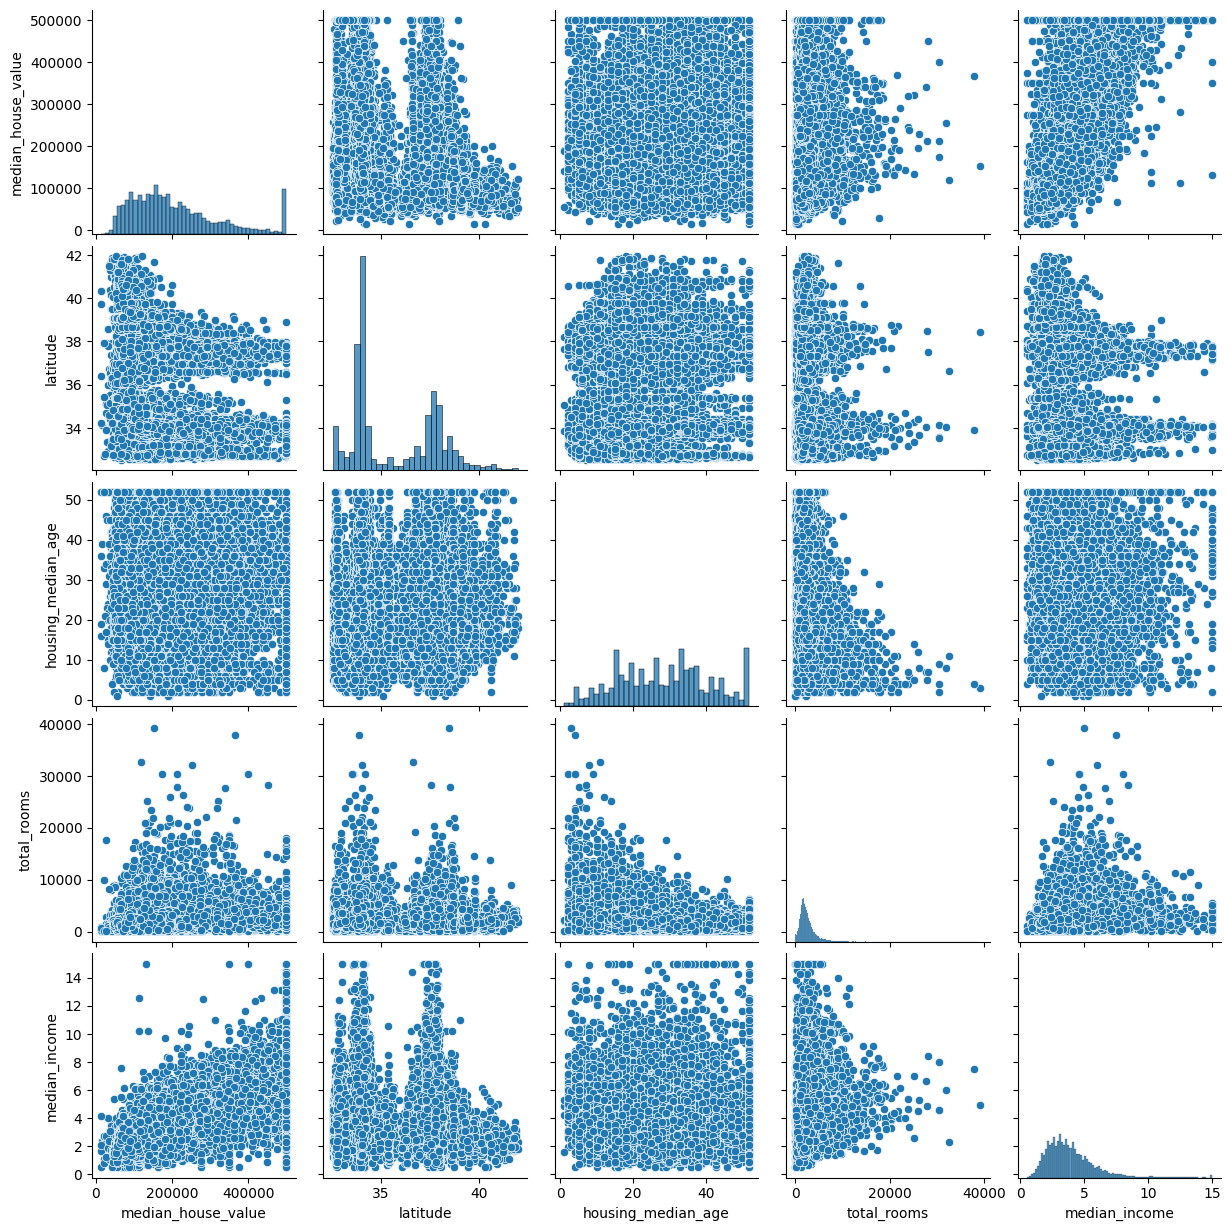

['latitude', 'housing_median_age', 'total_rooms', 'median_income']

In [103]:
# test scenario 1: no columns specified
plot_features_num_regression(inmo_df, target_col="median_house_value", columns=[], umbral_corr=0.1, pvalue=0.95)

'total_bedrooms' did not meet the correlation threshold of 0.1.
'total_bedrooms' was removed from columns list
'population' did not meet the correlation threshold of 0.1.
'population' was removed from columns list
columns selected for pair plot analysis were: ['total_rooms', 'housing_median_age']


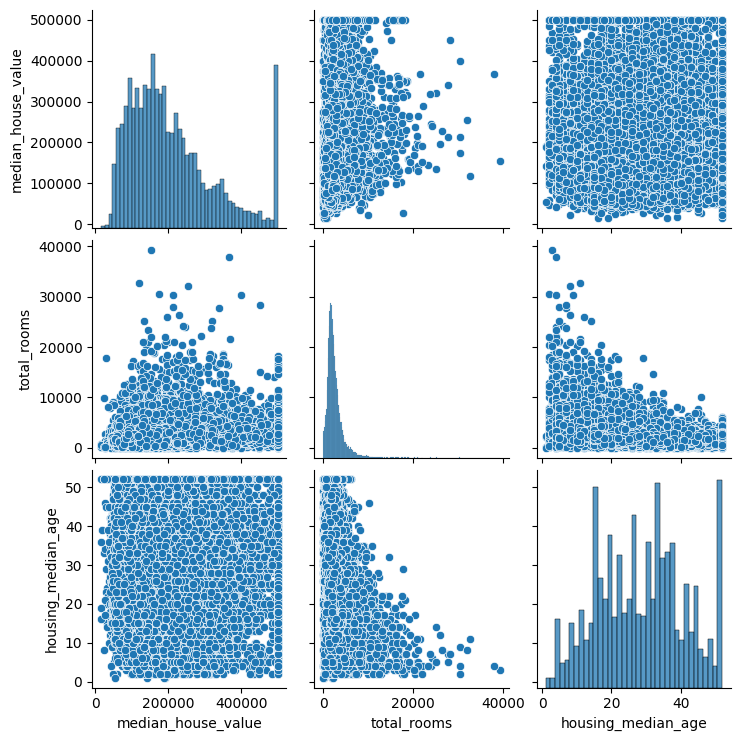

['total_rooms', 'housing_median_age']

In [101]:
# test scenario 2: columns specified but some do not meet specified thresholds
plot_features_num_regression(inmo_df, target_col="median_house_value", columns=['total_bedrooms','total_rooms','population','housing_median_age'], umbral_corr=0.1, pvalue=0.95)

'total_bedrooms' did not meet the correlation threshold of 0.1.
'total_bedrooms' was removed from columns list
'population' did not meet the correlation threshold of 0.1.
'population' was removed from columns list


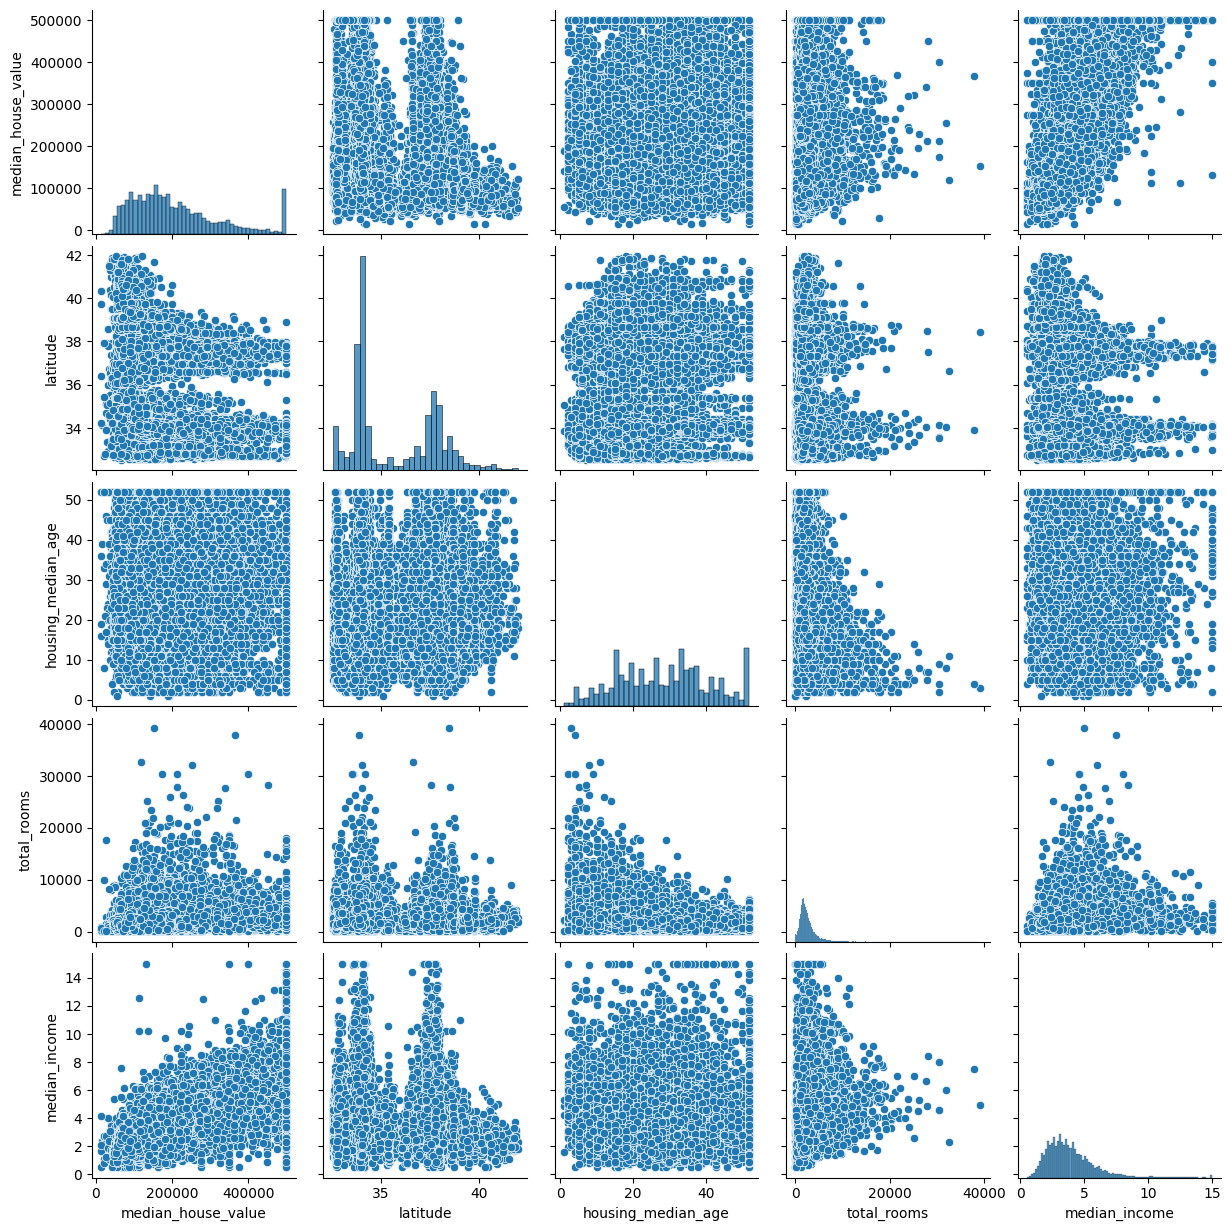

['latitude', 'housing_median_age', 'total_rooms', 'median_income']

In [94]:
# test scenario 3: columns specified but none meet thresholds
plot_features_num_regression(inmo_df, target_col="median_house_value", columns=['total_bedrooms','population'], umbral_corr=0.1, pvalue=0.95)

---
### Funcion 5: get_features_cat_regression

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad y una variable float "pvalue" cuyo valor por defecto será 0.05.

La función debe devolver una lista con las columnas categóricas del dataframe cuyo test de relación con la columna designada por 'target_col' supere en confianza estadística el test de relación que sea necesario hacer (es decir la función debe poder escoger cuál de los dos test que hemos aprendido tiene que hacer).
--> look up categoric / numeric hypotheses

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [17]:
# from scipy.stats import f_oneway, mannwhitneyu
# possibile addition? --> see comment marked ???
def get_features_cat_regression(df, target_col, pvalue=0.05, card=20):
    """
    Identifies and evaluates the significance of relationship between categorical columns and a specified numeric target column in a DataFrame.
    Uses ANOVA for multi-cats or Mann_whitney U for binary-cats
    Stores and returns a list of columns that have show a significant relationship with target column based on spcifed (optionally) pvalue.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data
    target_col (str): Numeric target column for testing relationship with categorical columns
    pvalue (float, optional, Default=0.05): Significance level (between 0 and 1) for statistical test evaluation.
    card (int): Cardinality threshold (based on unique values) to determine if a column should be considered categorical.

    Returns:
    list ('categorical_features'): A list of categorical columns that have a significant relationship with target column based on pvalue arguement.
    """
    # Carry out input data checks
    #1. Check df is a dataframe
    if not isinstance(df, pd.DataFrame):
        print('First arguement must be a Pandas DataFrame.')
        return None
    
    #2. Check target column in DataFrame
    if not target_col in df.columns:
        print(f"The target column ('{target_col}') must be in the DataFrame.")
        return None
    
    # Check target column is numeric and has sufficiently high cardinality
    if not (pd.api.types.is_numeric_dtype(df[target_col]) and df[target_col].nunique() > card):
        print(f"The target column ('{target_col}') must be a numeric continuous variable with high cardinality.\nCheck 'card' value")

    # Check pvalue is float between 0 and 1 (and not (0 <= pvalue => 1)
    if pvalue is not None:
        if not isinstance(pvalue, (int, float)) or not (0 <= pvalue <= 1):
            print("'pvalue' must be a 'None' or a number between 0 and 1.")
            return None
    
    # Create empty list to store columns considered to have statistically significant relationship with target column
    categorical_features = []

    # Loop through each column in the DataFrame
    for col in df.columns:
        if col == target_col: # Skip target column itself
            continue
        
        # Check the cardinality of column to decide if categorical or not
        if len(df[col].unique()) <= card: #??? Could we add if 'df[col].dtype == 'object' to this if?
            # If categorical and binary perform Mann-Whitney U test
            if df[col].nunique() == 2:
                groupA = df[df[col] == df[col].unique()[0]][target_col]
                groupB = df[df[col] == df[col].unique()[1]][target_col]

                p_val = mannwhitneyu(groupA, groupB).pvalue
            
            else:
                # If categorical with more than 2 groups, perform ANOVA test
                groups = df[col].unique()
                target_by_groups = [df[df[col] == group][target_col] for group in groups]

                p_val = f_oneway(*target_by_groups).pvalue

            # Check p-val against pvalue arguement to see if significance threshold is met
            if p_val <= pvalue:
                categorical_features.append(col) # Add to categorical_features list if deemed significant

    # Return list of categorical features
    return categorical_features

In [16]:
# test 1: inmo_df no specified pvalue or cardinality threshold
get_features_cat_regression(inmo_df, 'median_house_value')

['ocean_proximity']

---
### Funcion 6: plot_features_cat_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un argumento ("pvalue") con valor 0.05 por defecto y un argumento "with_individual_plot" a False.

Si la lista no está vacía, la función pintará los histogramas agrupados de la variable "target_col" para cada uno de los valores de las variables categóricas incluidas en columns que cumplan que su test de relación con "target_col" es significatio para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_cat_regression`.